# Opções de Investimento

- [SELIC](#SELIC)
- [Cotação Dólar](#Cotação-Dólar)

In [47]:
#-- importando as libs
from pandas_datareader.data import DataReader
from datetime import date
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#-- difinindo as datas de exportação
start = date(2016, 1, 1)
end = date(2018, 12, 4)

In [3]:
ticker = 'GOOG'
data_source = 'yahoo'
stock_data_google = DataReader(ticker, data_source, start, end)

In [4]:
stock_data_google.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,744.059998,731.257996,743.000000,741.840027,3272800,741.840027
2016-01-05,752.000000,738.640015,746.450012,742.580017,1950700,742.580017
2016-01-06,747.179993,728.919983,730.000000,743.619995,1947000,743.619995
2016-01-07,738.500000,719.059998,730.309998,726.390015,2963700,726.390015
2016-01-08,733.229980,713.000000,731.450012,714.469971,2450900,714.469971


<function matplotlib.pyplot.show(*args, **kw)>

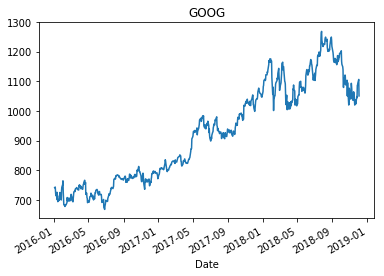

In [5]:
stock_data_google['Close'].plot(title=ticker)
plt.show

In [6]:
ticker = 'HGLG11.SA'
data_source = 'yahoo'
stock_data_cshg = DataReader(ticker, data_source, start, end)

<function matplotlib.pyplot.show(*args, **kw)>

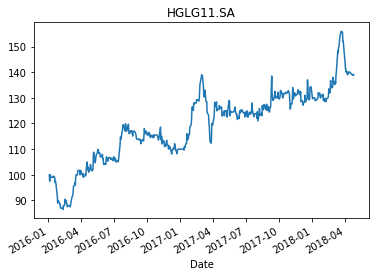

In [7]:
stock_data_cshg['Close'].plot(title=ticker)
plt.show

In [8]:
ticker = 'ITSA4.SA'
data_source = 'yahoo'
stock_data_itau = DataReader(ticker, data_source, start, end)

<function matplotlib.pyplot.show(*args, **kw)>

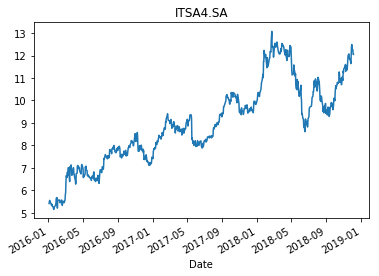

In [9]:
stock_data_itau['Close'].plot(title=ticker)
plt.show

In [10]:
ticker = 'HGLG11.SA'
data_source = 'yahoo'
stock_data_hlgl = DataReader(ticker, data_source, start, end)

<function matplotlib.pyplot.show(*args, **kw)>

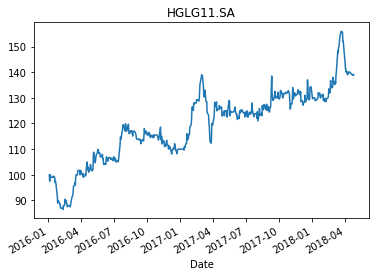

In [11]:
stock_data_hlgl['Close'].plot(title=ticker)
plt.show

## SELIC

In [12]:
url = urlopen("https://api.bcb.gov.br/dados/serie/bcdata.sgs.11/dados?formato=json").read()
soup = BeautifulSoup(url)

In [40]:
#-- importando a taxa selic diária 
api = requests.get('https://api.bcb.gov.br/dados/serie/bcdata.sgs.11/dados?formato=json')
json = api.json()
db = pd.DataFrame(json)
for user in json:
    print('{0} ({1})'.format(user['data'], user['valor']))

04/06/1986 (0.065041)
05/06/1986 (0.067397)
06/06/1986 (0.066740)
09/06/1986 (0.068247)
10/06/1986 (0.067041)
11/06/1986 (0.066740)
12/06/1986 (0.066575)
13/06/1986 (0.066164)
16/06/1986 (0.066493)
17/06/1986 (0.066247)
18/06/1986 (0.066301)
19/06/1986 (0.066164)
20/06/1986 (0.066055)
23/06/1986 (0.066110)
24/06/1986 (0.066027)
25/06/1986 (0.066493)
26/06/1986 (0.066411)
27/06/1986 (0.066301)
30/06/1986 (0.066603)
01/07/1986 (0.066630)
02/07/1986 (0.068301)
03/07/1986 (0.073973)
04/07/1986 (0.083178)
07/07/1986 (0.083315)
08/07/1986 (0.083151)
09/07/1986 (0.084411)
10/07/1986 (0.085096)
11/07/1986 (0.085151)
14/07/1986 (0.085178)
15/07/1986 (0.084767)
16/07/1986 (0.084849)
17/07/1986 (0.084849)
18/07/1986 (0.085014)
21/07/1986 (0.085041)
22/07/1986 (0.085260)
23/07/1986 (0.087890)
24/07/1986 (0.088164)
25/07/1986 (0.088438)
28/07/1986 (0.088849)
29/07/1986 (0.088849)
30/07/1986 (0.088795)
31/07/1986 (0.088849)
01/08/1986 (0.088986)
04/08/1986 (0.089315)
05/08/1986 (0.089671)
06/08/1986

16/08/1993 (1.347000)
17/08/1993 (1.347333)
18/08/1993 (1.348333)
19/08/1993 (1.349000)
20/08/1993 (1.351000)
23/08/1993 (1.353333)
24/08/1993 (1.359000)
25/08/1993 (1.369333)
26/08/1993 (1.387333)
27/08/1993 (1.404000)
30/08/1993 (1.423667)
31/08/1993 (1.443333)
01/09/1993 (1.459333)
02/09/1993 (1.461667)
03/09/1993 (1.462667)
06/09/1993 (1.463667)
08/09/1993 (1.468667)
09/09/1993 (1.474333)
10/09/1993 (1.480000)
13/09/1993 (1.484333)
14/09/1993 (1.489333)
15/09/1993 (1.495000)
16/09/1993 (1.500333)
17/09/1993 (1.504333)
20/09/1993 (1.516333)
21/09/1993 (1.532000)
22/09/1993 (1.544000)
23/09/1993 (1.558667)
24/09/1993 (1.572667)
27/09/1993 (1.585000)
28/09/1993 (1.598667)
29/09/1993 (1.611667)
30/09/1993 (1.625000)
01/10/1993 (1.638000)
04/10/1993 (1.638667)
05/10/1993 (1.638333)
06/10/1993 (1.638000)
07/10/1993 (1.638667)
08/10/1993 (1.638333)
11/10/1993 (1.637667)
13/10/1993 (1.638000)
14/10/1993 (1.638000)
15/10/1993 (1.637667)
18/10/1993 (1.638000)
19/10/1993 (1.638333)
20/10/1993

19/08/1997 (0.075000)
20/08/1997 (0.075000)
21/08/1997 (0.075000)
22/08/1997 (0.075000)
25/08/1997 (0.075000)
26/08/1997 (0.075000)
27/08/1997 (0.075000)
28/08/1997 (0.075000)
29/08/1997 (0.074667)
01/09/1997 (0.072667)
02/09/1997 (0.072333)
03/09/1997 (0.072000)
04/09/1997 (0.072000)
05/09/1997 (0.072000)
08/09/1997 (0.072000)
09/09/1997 (0.072000)
10/09/1997 (0.072000)
11/09/1997 (0.072000)
12/09/1997 (0.072333)
15/09/1997 (0.072333)
16/09/1997 (0.072000)
17/09/1997 (0.072000)
18/09/1997 (0.072000)
19/09/1997 (0.072000)
22/09/1997 (0.071667)
23/09/1997 (0.072000)
24/09/1997 (0.071667)
25/09/1997 (0.071333)
26/09/1997 (0.070667)
29/09/1997 (0.069667)
30/09/1997 (0.069667)
01/10/1997 (0.069000)
02/10/1997 (0.068667)
03/10/1997 (0.068667)
06/10/1997 (0.068667)
07/10/1997 (0.069000)
08/10/1997 (0.068667)
09/10/1997 (0.068667)
10/10/1997 (0.068667)
13/10/1997 (0.068667)
14/10/1997 (0.069333)
15/10/1997 (0.069333)
16/10/1997 (0.069333)
17/10/1997 (0.069000)
20/10/1997 (0.069000)
21/10/1997

11/08/2003 (0.086549)
12/08/2003 (0.086518)
13/08/2003 (0.086518)
14/08/2003 (0.086486)
15/08/2003 (0.086454)
18/08/2003 (0.086454)
19/08/2003 (0.086486)
20/08/2003 (0.086070)
21/08/2003 (0.078386)
22/08/2003 (0.078419)
25/08/2003 (0.078419)
26/08/2003 (0.078419)
27/08/2003 (0.078419)
28/08/2003 (0.078386)
29/08/2003 (0.078386)
01/09/2003 (0.078386)
02/09/2003 (0.078386)
03/09/2003 (0.078419)
04/09/2003 (0.078419)
05/09/2003 (0.078419)
08/09/2003 (0.078419)
09/09/2003 (0.078419)
10/09/2003 (0.078419)
11/09/2003 (0.078419)
12/09/2003 (0.078419)
15/09/2003 (0.078419)
16/09/2003 (0.078419)
17/09/2003 (0.078386)
18/09/2003 (0.071879)
19/09/2003 (0.071879)
22/09/2003 (0.071879)
23/09/2003 (0.071879)
24/09/2003 (0.071879)
25/09/2003 (0.071879)
26/09/2003 (0.071879)
29/09/2003 (0.071846)
30/09/2003 (0.071846)
01/10/2003 (0.071813)
02/10/2003 (0.071813)
03/10/2003 (0.071846)
06/10/2003 (0.071846)
07/10/2003 (0.071846)
08/10/2003 (0.071846)
09/10/2003 (0.071846)
10/10/2003 (0.071846)
13/10/2003

01/08/2007 (0.042956)
02/08/2007 (0.042956)
03/08/2007 (0.042956)
06/08/2007 (0.042956)
07/08/2007 (0.042956)
08/08/2007 (0.042956)
09/08/2007 (0.042956)
10/08/2007 (0.042956)
13/08/2007 (0.042921)
14/08/2007 (0.042956)
15/08/2007 (0.042956)
16/08/2007 (0.042956)
17/08/2007 (0.042956)
20/08/2007 (0.042956)
21/08/2007 (0.042956)
22/08/2007 (0.042956)
23/08/2007 (0.042956)
24/08/2007 (0.042956)
27/08/2007 (0.042956)
28/08/2007 (0.042956)
29/08/2007 (0.042956)
30/08/2007 (0.042956)
31/08/2007 (0.042956)
03/09/2007 (0.042956)
04/09/2007 (0.042956)
05/09/2007 (0.042956)
06/09/2007 (0.042065)
10/09/2007 (0.042065)
11/09/2007 (0.042065)
12/09/2007 (0.042065)
13/09/2007 (0.042065)
14/09/2007 (0.042065)
17/09/2007 (0.042065)
18/09/2007 (0.042065)
19/09/2007 (0.042065)
20/09/2007 (0.042065)
21/09/2007 (0.042065)
24/09/2007 (0.042065)
25/09/2007 (0.042065)
26/09/2007 (0.042065)
27/09/2007 (0.042065)
28/09/2007 (0.042065)
01/10/2007 (0.042065)
02/10/2007 (0.042065)
03/10/2007 (0.042065)
04/10/2007

22/07/2013 (0.032012)
23/07/2013 (0.032012)
24/07/2013 (0.032012)
25/07/2013 (0.032012)
26/07/2013 (0.032012)
29/07/2013 (0.032012)
30/07/2013 (0.032012)
31/07/2013 (0.032012)
01/08/2013 (0.032012)
02/08/2013 (0.032012)
05/08/2013 (0.032012)
06/08/2013 (0.032012)
07/08/2013 (0.032012)
08/08/2013 (0.032012)
09/08/2013 (0.032012)
12/08/2013 (0.032012)
13/08/2013 (0.032012)
14/08/2013 (0.032012)
15/08/2013 (0.032012)
16/08/2013 (0.032012)
19/08/2013 (0.032012)
20/08/2013 (0.032012)
21/08/2013 (0.032012)
22/08/2013 (0.032012)
23/08/2013 (0.032012)
26/08/2013 (0.032012)
27/08/2013 (0.032012)
28/08/2013 (0.032012)
29/08/2013 (0.033839)
30/08/2013 (0.033839)
02/09/2013 (0.033839)
03/09/2013 (0.033839)
04/09/2013 (0.033839)
05/09/2013 (0.033839)
06/09/2013 (0.033839)
09/09/2013 (0.033839)
10/09/2013 (0.033839)
11/09/2013 (0.033839)
12/09/2013 (0.033839)
13/09/2013 (0.033839)
16/09/2013 (0.033839)
17/09/2013 (0.033839)
18/09/2013 (0.033839)
19/09/2013 (0.033839)
20/09/2013 (0.033839)
23/09/2013

In [14]:
db

,data,valor
0,04/06/1986,0.065041
1,05/06/1986,0.067397
2,06/06/1986,0.066740
3,09/06/1986,0.068247
4,10/06/1986,0.067041
5,11/06/1986,0.066740
6,12/06/1986,0.066575
7,13/06/1986,0.066164
8,16/06/1986,0.066493
9,17/06/1986,0.066247


In [15]:
api = requests.get('https://api.bcb.gov.br/dados/serie/bcdata.sgs.4390/dados?formato=json')

json = api.json()

db_mes = pd.DataFrame(json)

In [16]:
db_mes

,data,valor
0,01/06/1986,1.27
1,01/07/1986,1.95
2,01/08/1986,2.57
3,01/09/1986,2.94
4,01/10/1986,1.96
5,01/11/1986,2.37
6,01/12/1986,5.47
7,01/01/1987,11.00
8,01/02/1987,19.61
9,01/03/1987,11.95


## Cotação Dólar

In [54]:
dolar = requests.get("https://olinda.bcb.gov.br/olinda/servico/PTAX/versao/v1/odata/CotacaoDolarPeriodo(dataInicial=@dataInicial,dataFinalCotacao=@dataFinalCotacao)?@dataInicial='01-01-2000'&@dataFinalCotacao='12-21-2018'&$format=json")

json = dolar.json()

db_dolar = pd.DataFrame(json)

In [55]:
db_dolar.tail()

,@odata.context,value
4762,https://was-p.bcnet.bcb.gov.br/olinda/servico/...,"{'cotacaoCompra': 3.9115, 'cotacaoVenda': 3.91..."
4763,https://was-p.bcnet.bcb.gov.br/olinda/servico/...,"{'cotacaoCompra': 3.8991, 'cotacaoVenda': 3.89..."
4764,https://was-p.bcnet.bcb.gov.br/olinda/servico/...,"{'cotacaoCompra': 3.8901, 'cotacaoVenda': 3.89..."
4765,https://was-p.bcnet.bcb.gov.br/olinda/servico/...,"{'cotacaoCompra': 3.8437, 'cotacaoVenda': 3.84..."
4766,https://was-p.bcnet.bcb.gov.br/olinda/servico/...,"{'cotacaoCompra': 3.8665, 'cotacaoVenda': 3.86..."


In [56]:
for user in db_dolar['value']:
    print('{0} ({1})'.format(user['dataHoraCotacao'], user['cotacaoCompra']))

2000-01-03 19:43:00.0 (1.8003)
2000-01-04 19:13:00.0 (1.8329)
2000-01-05 19:11:00.0 (1.8536)
2000-01-06 19:16:00.0 (1.8453)
2000-01-07 19:23:00.0 (1.8273)
2000-01-10 19:12:00.0 (1.8153)
2000-01-11 19:19:00.0 (1.8211)
2000-01-12 19:12:00.0 (1.8306)
2000-01-13 19:15:00.0 (1.8185)
2000-01-14 19:15:00.0 (1.7989)
2000-01-17 19:13:00.0 (1.7949)
2000-01-18 19:19:00.0 (1.7916)
2000-01-19 19:14:00.0 (1.7976)
2000-01-20 19:10:00.0 (1.7793)
2000-01-21 19:09:00.0 (1.7776)
2000-01-24 19:14:00.0 (1.7644)
2000-01-25 19:10:00.0 (1.7733)
2000-01-26 19:31:00.0 (1.7761)
2000-01-27 19:24:00.0 (1.7745)
2000-01-28 19:10:00.0 (1.7867)
2000-01-31 19:22:00.0 (1.8016)
2000-02-01 19:13:00.0 (1.7924)
2000-02-02 19:14:00.0 (1.7892)
2000-02-03 19:10:00.0 (1.7771)
2000-02-04 19:11:00.0 (1.7777)
2000-02-07 19:17:00.0 (1.7651)
2000-02-08 19:42:00.0 (1.7646)
2000-02-09 19:24:00.0 (1.7624)
2000-02-10 19:22:00.0 (1.7687)
2000-02-11 19:21:00.0 (1.7639)
2000-02-14 19:17:00.0 (1.7691)
2000-02-15 19:16:00.0 (1.7756)
2000-02-

2005-05-11 17:40:00.0 (2.4711)
2005-05-12 17:41:00.0 (2.464)
2005-05-13 17:38:00.0 (2.4707)
2005-05-16 18:12:00.0 (2.4764)
2005-05-17 17:54:00.0 (2.4771)
2005-05-18 17:56:00.0 (2.4628)
2005-05-19 17:40:00.0 (2.445)
2005-05-20 17:37:00.0 (2.4485)
2005-05-23 17:45:00.0 (2.4291)
2005-05-24 17:47:00.0 (2.4305)
2005-05-25 17:44:00.0 (2.4108)
2005-05-27 17:40:00.0 (2.3926)
2005-05-30 17:48:00.0 (2.3776)
2005-05-31 17:57:00.0 (2.403)
2005-06-01 17:50:00.0 (2.4278)
2005-06-02 18:04:00.0 (2.4194)
2005-06-03 17:51:00.0 (2.4021)
2005-06-06 17:50:00.0 (2.4568)
2005-06-07 17:39:00.0 (2.4624)
2005-06-08 17:43:00.0 (2.4456)
2005-06-09 17:46:00.0 (2.4883)
2005-06-10 17:43:00.0 (2.4743)
2005-06-13 17:42:00.0 (2.4554)
2005-06-14 17:39:00.0 (2.4367)
2005-06-15 17:38:00.0 (2.4447)
2005-06-16 17:59:00.0 (2.4153)
2005-06-17 17:57:00.0 (2.3865)
2005-06-20 17:38:00.0 (2.3847)
2005-06-21 17:41:00.0 (2.3764)
2005-06-22 17:41:00.0 (2.3695)
2005-06-23 17:39:00.0 (2.3924)
2005-06-24 17:40:00.0 (2.3869)
2005-06-27 

2009-05-06 17:32:00.0 (2.1205)
2009-05-07 17:35:00.0 (2.0976)
2009-05-08 17:35:00.0 (2.0742)
2009-05-11 17:33:00.0 (2.0571)
2009-05-12 17:35:00.0 (2.0641)
2009-05-13 17:33:00.0 (2.0984)
2009-05-14 17:42:00.0 (2.0921)
2009-05-15 17:36:00.0 (2.0754)
2009-05-18 17:36:00.0 (2.0776)
2009-05-19 17:37:00.0 (2.048)
2009-05-20 17:34:00.0 (2.0191)
2009-05-21 17:39:00.0 (2.0256)
2009-05-22 17:53:00.0 (2.0271)
2009-05-25 17:37:00.0 (2.0226)
2009-05-26 17:42:00.0 (2.0253)
2009-05-27 17:32:00.0 (2.0087)
2009-05-28 17:38:00.0 (2.0136)
2009-05-29 17:33:00.0 (1.9722)
2009-06-01 17:36:00.0 (1.9432)
2009-06-02 17:35:00.0 (1.9362)
2009-06-03 17:34:00.0 (1.9592)
2009-06-04 17:34:00.0 (1.9489)
2009-06-05 17:41:00.0 (1.9526)
2009-06-08 17:36:00.0 (1.9696)
2009-06-09 17:34:00.0 (1.9377)
2009-06-10 17:33:00.0 (1.9466)
2009-06-12 17:37:00.0 (1.9293)
2009-06-15 17:35:00.0 (1.945)
2009-06-16 17:36:00.0 (1.9453)
2009-06-17 17:34:00.0 (1.9776)
2009-06-18 17:36:00.0 (1.9701)
2009-06-19 17:36:00.0 (1.9584)
2009-06-22

2015-04-22 13:11:35.164 (3.018)
2015-04-23 13:10:51.977 (3.0077)
2015-04-24 13:11:32.83 (2.9739)
2015-04-27 13:05:56.299 (2.9229)
2015-04-28 13:07:06.197 (2.8937)
2015-04-29 13:05:35.523 (2.9369)
2015-04-30 13:09:01.536 (2.993)
2015-05-04 13:04:31.623 (3.0748)
2015-05-05 13:11:27.051 (3.0619)
2015-05-06 13:08:07.881 (3.0414)
2015-05-07 13:10:36.844 (3.0415)
2015-05-08 13:05:49.374 (2.9959)
2015-05-11 13:11:33.188 (3.0169)
2015-05-12 13:09:37.255 (3.0382)
2015-05-13 13:08:11.125 (3.0096)
2015-05-14 13:05:45.879 (3.0026)
2015-05-15 13:05:47.546 (2.9887)
2015-05-18 13:06:49.146 (3.0139)
2015-05-19 13:11:17.406 (3.0278)
2015-05-20 13:06:32.276 (3.034)
2015-05-21 13:07:52.269 (3.0289)
2015-05-22 13:05:24.649 (3.0647)
2015-05-25 13:09:06.658 (3.1206)
2015-05-26 13:09:44.364 (3.1345)
2015-05-27 13:12:16.822 (3.1734)
2015-05-28 13:02:56.559 (3.1741)
2015-05-29 13:04:28.682 (3.1781)
2015-06-01 13:09:42.251 (3.1783)
2015-06-02 13:07:54.511 (3.1437)
2015-06-03 13:10:07.382 (3.1178)
2015-06-05 13:

In [57]:
db_dolar_v = db_dolar.loc[:,'value']
db_dolar_v

0       {'cotacaoCompra': 1.8003, 'cotacaoVenda': 1.80...
1       {'cotacaoCompra': 1.8329, 'cotacaoVenda': 1.83...
2       {'cotacaoCompra': 1.8536, 'cotacaoVenda': 1.85...
3       {'cotacaoCompra': 1.8453, 'cotacaoVenda': 1.84...
4       {'cotacaoCompra': 1.8273, 'cotacaoVenda': 1.82...
5       {'cotacaoCompra': 1.8153, 'cotacaoVenda': 1.81...
6       {'cotacaoCompra': 1.8211, 'cotacaoVenda': 1.82...
7       {'cotacaoCompra': 1.8306, 'cotacaoVenda': 1.83...
8       {'cotacaoCompra': 1.8185, 'cotacaoVenda': 1.81...
9       {'cotacaoCompra': 1.7989, 'cotacaoVenda': 1.79...
10      {'cotacaoCompra': 1.7949, 'cotacaoVenda': 1.79...
11      {'cotacaoCompra': 1.7916, 'cotacaoVenda': 1.79...
12      {'cotacaoCompra': 1.7976, 'cotacaoVenda': 1.79...
13      {'cotacaoCompra': 1.7793, 'cotacaoVenda': 1.78...
14      {'cotacaoCompra': 1.7776, 'cotacaoVenda': 1.77...
15      {'cotacaoCompra': 1.7644, 'cotacaoVenda': 1.76...
16      {'cotacaoCompra': 1.7733, 'cotacaoVenda': 1.77...
17      {'cota

In [58]:
db_dolar_c = pd.DataFrame.from_records(db_dolar_v)
db_dolar_c.head()

,cotacaoCompra,cotacaoVenda,dataHoraCotacao
0,1.8003,1.8011,2000-01-03 19:43:00.0
1,1.8329,1.8337,2000-01-04 19:13:00.0
2,1.8536,1.8544,2000-01-05 19:11:00.0
3,1.8453,1.8461,2000-01-06 19:16:00.0
4,1.8273,1.8281,2000-01-07 19:23:00.0


In [59]:
db_dolar_c.tail()

,cotacaoCompra,cotacaoVenda,dataHoraCotacao
4762,3.9115,3.9121,2018-12-17 13:08:43.268
4763,3.8991,3.8997,2018-12-18 13:11:50.052
4764,3.8901,3.8907,2018-12-19 13:04:57.292
4765,3.8437,3.8443,2018-12-20 13:03:35.898
4766,3.8665,3.8671,2018-12-21 13:07:13.892


C:\Users\thiago.mauricio\AppData\Local\Continuum\anaconda3\envs\tera-jul2018\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


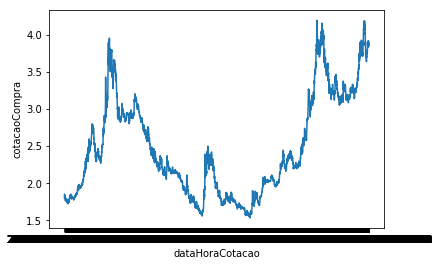

In [60]:
sns.lineplot(x=db_dolar_c['dataHoraCotacao'], y=db_dolar_c['cotacaoCompra'])